# Part I - Prosper Loan Data Exploration
## by Akinyemi Tito.

## Introduction
>  This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. See this data dictionary to understand the dataset's variables. The data dictionary https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554484977407000


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#loading the dataset
loan_df= pd.read_csv('prosperLoanData.csv')
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


#### Wrangling of dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d85cbba90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4d8950ed30>]], dtype=object)

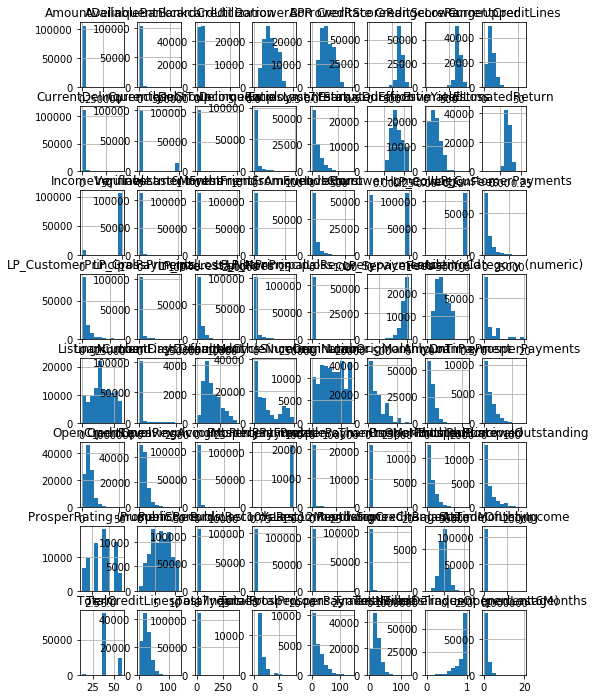

In [3]:
loan_df.hist(figsize= (8,12))

In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
loan_df.shape

(113937, 81)

In [6]:
Inquiries= loan_df.iloc[:, 33:35]
Inquiries.head()

,InquiriesLast6Months,TotalInquiries
0,3.0,3.0
1,3.0,5.0
2,0.0,1.0
3,0.0,1.0
4,1.0,9.0


In [7]:
#changing datatypes to category
ordered_cat= {
    'ProsperScore': [0,1,2,3,4,5,6,7,8,9,10, 11],
    
    'IncomeRange': ['$100,000+','$75,000-99,999', '$50,000-74,999', '$25,000-49,999',
                    '$1-24,999' ,'Not displayed'  , '$0' ,'Not employed'] ,
    
    'ProsperRating (Alpha)': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
     }
cat= ['ListingCategory (numeric)' , 'IncomeVerifiable', 'IsBorrowerHomeowner', 'LoanStatus', 'EmploymentStatus']
for var in ordered_cat:
    ordered_var= pd.api.types.CategoricalDtype(ordered=True,
                                              categories= ordered_cat[var] )
    loan_df[var]= loan_df[var].astype(ordered_var)
for var in cat:
    unordered_var= pd.api.types.CategoricalDtype(ordered=False)
    loan_df[var]= loan_df[var].astype(unordered_var)


In [8]:
loan = loan_df.iloc[: , [63,5,4,7,8,14,15,16,18,19,20,21,34,42,43,51,46,47,48,56,80]]
loan=loan[~loan['ProsperScore'].isnull()]
loan.shape

(84853, 21)

In [9]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 21 columns):
LoanOriginalAmount           84853 non-null int64
LoanStatus                   84853 non-null category
Term                         84853 non-null int64
BorrowerAPR                  84853 non-null float64
BorrowerRate                 84853 non-null float64
ProsperRating (Alpha)        84853 non-null category
ProsperScore                 84853 non-null category
ListingCategory (numeric)    84853 non-null category
Occupation                   83520 non-null object
EmploymentStatus             84853 non-null category
EmploymentStatusDuration     84834 non-null float64
IsBorrowerHomeowner          84853 non-null category
TotalInquiries               84853 non-null float64
AvailableBankcardCredit      84853 non-null float64
TotalTrades                  84853 non-null float64
TotalProsperLoans            19797 non-null float64
DebtToIncomeRatio            77557 non-null float64
Incom

In [10]:
loan.columns

Index(['LoanOriginalAmount', 'LoanStatus', 'Term', 'BorrowerAPR',
       'BorrowerRate', 'ProsperRating (Alpha)', 'ProsperScore',
       'ListingCategory (numeric)', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'TotalInquiries',
       'AvailableBankcardCredit', 'TotalTrades', 'TotalProsperLoans',
       'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable',
       'ProsperPrincipalBorrowed', 'Investors'],
      dtype='object')

### What is the structure of your dataset?

> Loan dataframe is a subset of the original Prosper loan data containing 21 columns including the loan status, original amount, interest rate, term in montths and many more as displayed above. It contains all rows that had a prosper rating that was not null.

### What is/are the main feature(s) of interest in your dataset?

> I will try to determine the most common loan status and Prosper rating.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> For the analysis, i will be focusing on the categorical columns and their distribution in the dataset. Also factors  affecting interest rate.

## Univariate Exploration



visualizing Income Range and employement status
> What's the most common prosper rating?

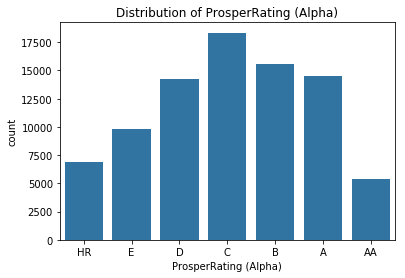

In [11]:
## a countplot function that takes the x-axis parameter, the figure title and ylabel.

def count_chart(x):
    fig_title= 'Distribution of '+ x
    base_color= sns.color_palette()[0]
    sns.countplot(x=x, data=loan, color=base_color)
    plt.title(fig_title)
    plt.show()
count_chart('ProsperRating (Alpha)')

The most common prosper rating as seen above is C, the midway point in the ratings.

Visualizing the categorical variables

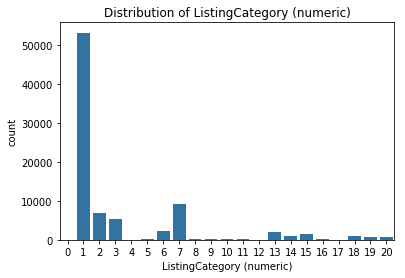

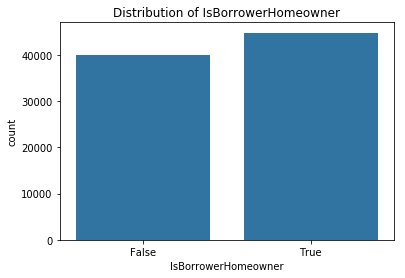

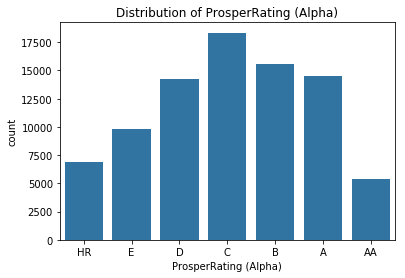

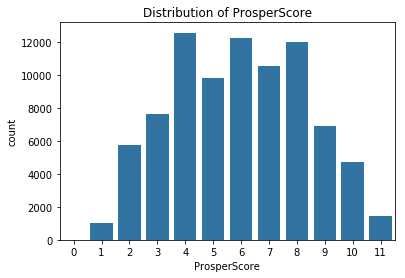

In [12]:
#create a list of columns to be visualised in a barplot
barplot= ('ListingCategory (numeric)' , 'IsBorrowerHomeowner',  'ProsperRating (Alpha)', 'ProsperScore')
#creating a loop through the list to plot them all      
for i in barplot: 
    x=i
    count_chart(x )
    
    

From the listing category most of the loans are listed under debt consolidation identified as 1.
More than 50% of the borrowers can verify their income status. there is little difference between the home owners. 
the Prosper rating of C is the most common in the dataset. 

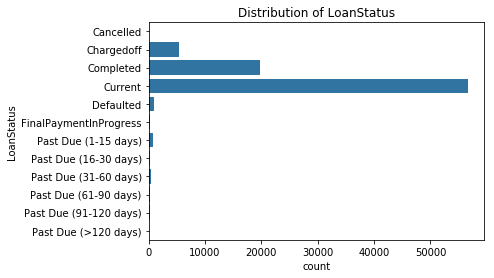

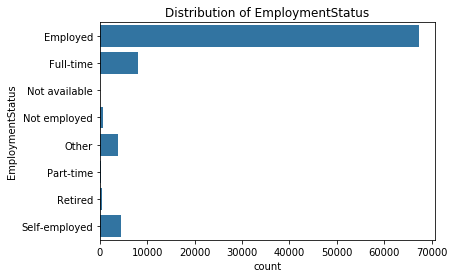

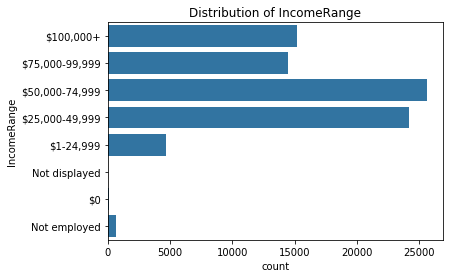

In [13]:
barplot= ('LoanStatus','EmploymentStatus', 'IncomeRange')
#creating a loop through the list to plot them all
def count_charty(y):
    fig_title= 'Distribution of '+ y
    base_color= sns.color_palette()[0]
    sns.countplot(y=y, data=loan, color=base_color)
    plt.title(fig_title)
    plt.show()     
for i in barplot:
    y=i
    count_charty(y) 

Most of the loans are currently ongoing and yet to be paid off. Borrowers are mostly employed with a decent income-range.

In [14]:
#Because the values are close..and the visualization is not clear enough.
loan['IsBorrowerHomeowner'].value_counts()
#Most people who borrow have homes but it's almost as much a speople who don't

True     44848
False    40005
Name: IsBorrowerHomeowner, dtype: int64

Text(0.5,0,'Prosper Score')

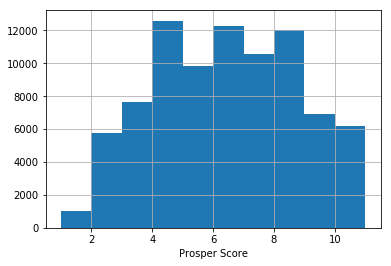

In [15]:
loan['ProsperScore'].hist()
plt.xlabel('Prosper Score')



The ProsperScore does not match the code in dataset making me to believe there is an error in collation with an addition of 1. since the highest score is meant to be 10..
ProsperScore is tri-peaked at 4,6 and 8 and if we subtract one that would be at 3, 5 and 7. 
Also most borrower's have an income range betwwen 25000- 50000 dollars.


>Can borrowers' verify their income status?

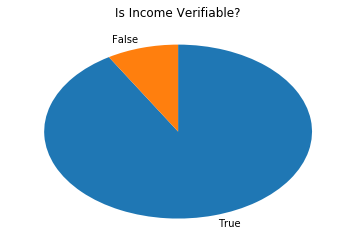

In [16]:
#pie chart showing the IncomeVerifiable column distribution
x=loan['IncomeVerifiable'].value_counts()
plt.pie(x, labels = x.index, startangle = 90, counterclock = False)
plt.title('Is Income Verifiable?')
plt.show()

#More than 50% of borrowers claim to be able to verify their inccome status

Borrower's mostly claim to able to verify their income status. This might be required to show they would be able to afford to mpay back loans in stated term.

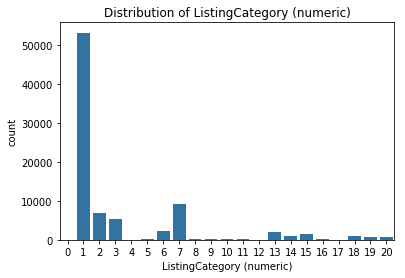

In [17]:

count_chart('ListingCategory (numeric)')

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> From the listing category most of the loans are listed under debt consolidation identified as 1.
More than 50% of the borrowers can verify their income status. there is little difference between the home owners. 
the Prosper rating of C is the most common in the dataset.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I selected rows in which ProsperScore is not null and performed my analysis

## Bivariate Exploration


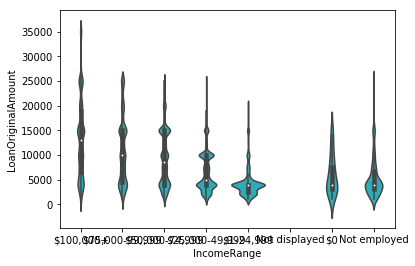

In [18]:
# Do people who earn more borrow the highest amount of money?
base_color= sns.color_palette()[9]
sns.violinplot(x='IncomeRange', y= 'LoanOriginalAmount', data=loan, color=base_color);


the violinplot shows that people with income of $10000+ have the highest range of loans also they have the highet mean which will be displayed further below.

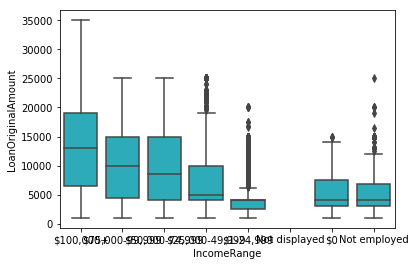

In [19]:
# Showing the boxplot to see outliers
sns.boxplot(x='IncomeRange', y= 'LoanOriginalAmount', data=loan, color=base_color);

In [20]:
load= loan_df.groupby('IncomeRange')['LoanOriginalAmount'].mean()
load

IncomeRange
$100,000+         13073.127300
$75,000-99,999    10365.923741
$50,000-74,999     8675.275781
$25,000-49,999     6177.987140
$1-24,999          4273.973742
Not displayed      5169.649012
$0                 7410.930757
Not employed       4884.828784
Name: LoanOriginalAmount, dtype: float64

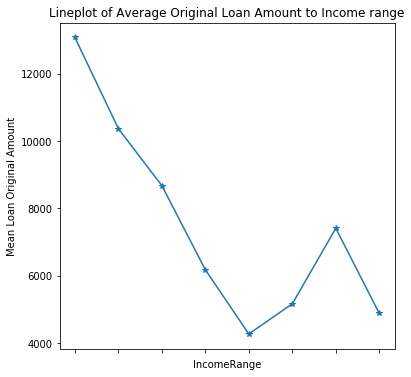

In [21]:
#Plotting the dataset above
# plotting the average Original amount to income range
load.plot(figsize=(6,6), marker='*')
plt.xticks(rotation=45)
plt.title('Lineplot of Average Original Loan Amount to Income range')
plt.ylabel('Mean Loan Original Amount');

the lineplot shows that the average loan borrowed to income range of borrowers. Unemployed people borrow more money than the least range of income.

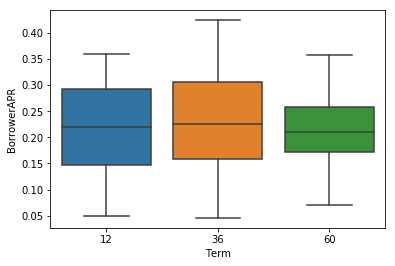

In [22]:
sns.boxplot(x='Term', y='BorrowerAPR', data= loan);

The most common period for repayment of loans is 36months or 3years.

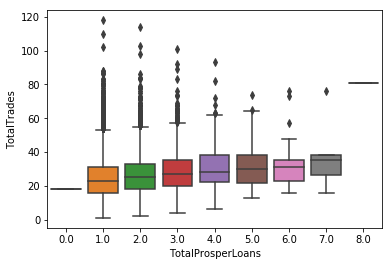

In [23]:
# plotting number of trades to total prosper loans
sns.boxplot(y='TotalTrades', x='TotalProsperLoans', data= loan);

The average total trades increases with an increase in prosper loans taken. As there is just one total trade of 8. the point is much higher and appears like a spike in the trend.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

What factors affect borrower rate

In [29]:
sns.scatterplot(y= 'BorrowerRate', x= 'BorrowerAPR', data= loan, hue= 'IsBorrowerHomeowner');


AttributeError: module 'seaborn' has no attribute 'scatterplot'

Loan amount above 25000 have a low interest rate barely greater than 0.2.
there's barely any correlation between the two variables above.
with a third variable.... I notice that those who own homes tend to receive a lower interest rate than those without homes.


In [ ]:
#Does the amount of loan correlate with the interest rate
fig =plt.figure(figsize=(15,10))
plt.subplot(3,1, 1)
sns.scatterplot(y= 'LoanOriginalAmount', x= 'BorrowerAPR', data= loan);

# adding a third variable
plt.subplot(3,1, 2)
ax = sns.scatterplot(y= 'LoanOriginalAmount', x= 'BorrowerAPR', data= loan,  hue= 'IsBorrowerHomeowner', alpha=0.4 );

# can they verify income
plt.subplot(3,1, 3)
ax= sns.scatterplot(y= 'LoanOriginalAmount', x= 'BorrowerAPR', data= loan,  hue= 'IncomeVerifiable', alpha=0.4 );



In [ ]:

sns.scatterplot(y= 'LoanOriginalAmount', x= 'BorrowerAPR', data= loan, hue='Term');

>People who borrow higher amounts have a longer term for repayment.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?|

> High loan amounts do not have the highest rates and also they have a term period of 36 or 60 months i.e 3-5 years

## Conclusions
> In conclusion, Yes peeople who earn more do tend to borrow higher amounts of money and also they have a higher term of 3-5 years for repayment of loans